# Task 1: Robustness test Groads and OSM

## Downloading necessary data

As part of the first task we need to compare the GRoads data with the OSM data.
GRoads data is up to until 2010, while for the OSM data we could acquire the latest data (December 2023) by Geofabrik. 
The earliest data we could obtain from Geofabrik is 2017-01-01.

At planet streetmap you can obtain full data for the whole planet from 2013 to 2023: https://planet.openstreetmap.org/
It is then possible to select specific countries by overlaying the outline of a country using the outlines available on: https://gadm.org/download_country.html 
Due to the large storage needed (50+ GB for each year), we could did not access the planet.openstreetmap data for 2013 and 2023, but instead choose to access the country specific data by Geofabrik.

Groads: https://sedac.ciesin.columbia.edu/data/set/groads-global-roads-open-access-v1
Geofabrik: https://download.geofabrik.de/africa/ghana.html

## Preparing GeoJSON files in QCIS

QGIS is the standard open source GIS application enabling the user to visualize, manage, edit, analyse data, and compose printable maps.
Download: https://qgis.org/en/site/

For obtaining the specific data of GRoads we had to use QCIS to put the outline of Ghana and Groadsdata on each other and use intersect to obtain the specific roads.
For the OSM data this was thus readily available and only the files needed to be exported to GeoJSON to work with in Python.


In [59]:
# importing necessary packages
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
# Groads
groadsghana2010 = gpd.read_file('GroadsGhana.geojson')
outlineghana = gpd.read_file('OutlineGhana.geojson')

In [61]:
# Osm
osmghana2023 = gpd.read_file('OSMGhana2023.geojson')
osmghana2017 = gpd.read_file('OSMGhana2017.geojson')

load the health facilities of Ghana
credits cleaning: Wes Layton 
see Wes Layton on Kaggle: https://www.kaggle.com/code/weslayton/mapping-ghana-health-infrastructure#Ghana-Health-Infrastructure
dataset health facilities: https://data.gov.gh/dataset/health-facilities
old dataset from 2016-02-05


In [62]:
# import files health facilities
# the loaded datasets are just the same as the one from the official website but made available by Wes Layton
fac = pd.read_csv('archive/health-facilities-gh.csv')
tier = pd.read_csv('archive/health-facility-tiers.csv')

# Cleaning up Type and Ownership.
# optional: plot by kind of health care facility and distinghuis between ownership
# we didn't but it is something to look into for more specific health facilities, e.g. maternity home to evaluate the impact of maternal mortality or infant mortality.

array_clinic = ['Clinic', 'clinic', 'Polyclinic']
array_chps = ['CHPS', 'CPHS']
array_teaching = ['Training Institution', 'Teaching Hospital', 'Research Institution']
array_maternity = ['Maternity Home', 'RCH', 'DHD']
array_hospital = ['Hospital', 'Psychiatric Hospital']
array_ghs = ['Municipal Health Directorate', 'Municipal Hospital', 'Municipal  Health Directorate', 'Regional Hospital', 'Regional Health Directorate', 'District Hospital', 'District Health Directorate', 'Metropolitan Hospital', 'Metropolitan Health Directorate']
array_centre = ['Health Centre', 'Centre']
array_other = ['Others']
array_private = ['Private', 'Metropolitan Hospital', 'Metropolitan Health Directorate', 'private', 'NGO', 'Maternity Home', 'Islamic', 'Muslim', 'Mission', 'Clinic']
array_government = ['Government', 'government']

fac['Type'] = fac['Type'].replace(array_clinic, 'Clinic')
fac['Type'] = fac['Type'].replace(array_chps, 'CHPS')
fac['Type'] = fac['Type'].replace(array_teaching, 'Teaching')
fac['Type'] = fac['Type'].replace(array_maternity, 'Maternity')
fac['Type'] = fac['Type'].replace(array_hospital, 'Hospital')
fac['Type'] = fac['Type'].replace(array_ghs, 'GHS')
fac['Type'] = fac['Type'].replace(array_centre, 'Health Centre')
fac['Type'] = fac['Type'].replace(array_other, 'Other')
fac['Ownership'] = fac['Ownership'].replace(array_private, 'Private')
fac['Ownership'] = fac['Ownership'].replace(array_government, 'Government')



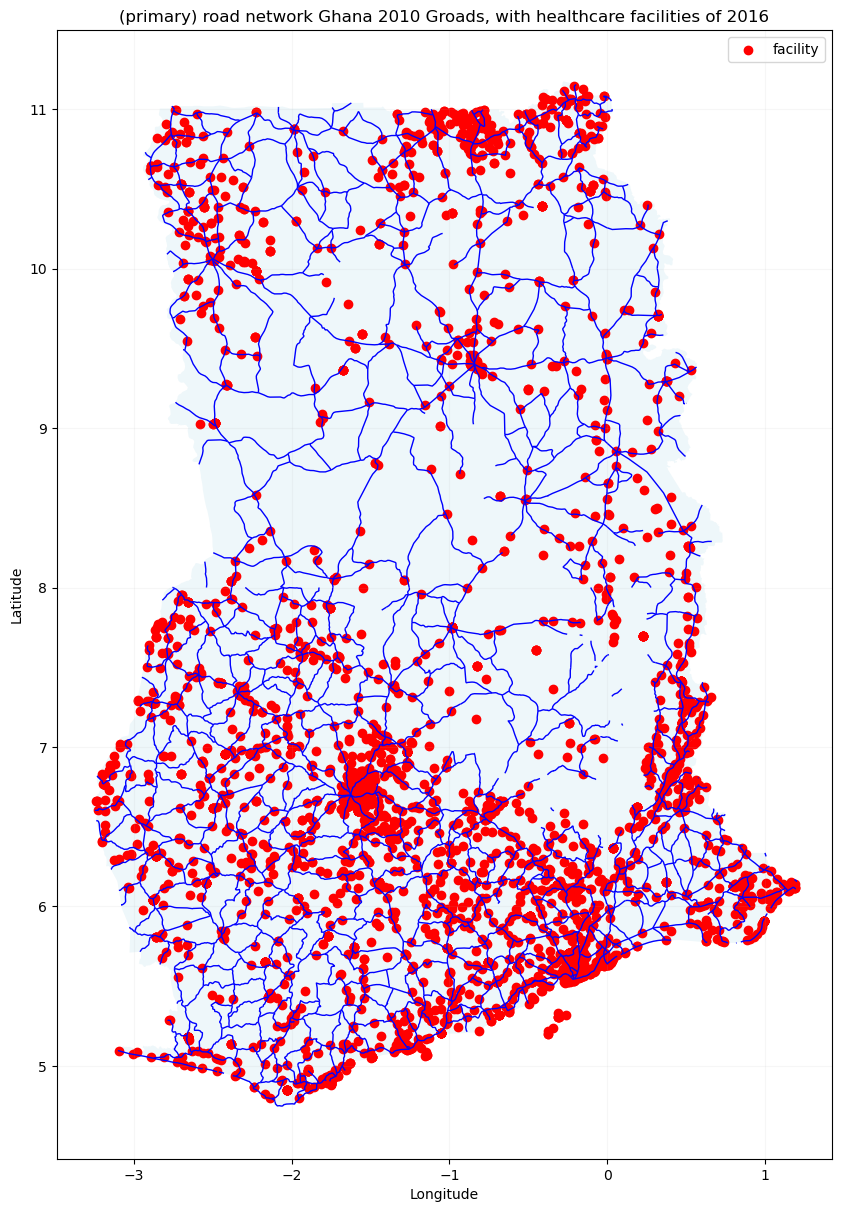

The number of health facilities in this figure: 3756


In [63]:
# Plotting GRoads

fig, ax = plt.subplots(figsize=(10, 15))  # You can adjust the figure size as needed
outlineghana.plot(ax=ax, color='lightblue', alpha=0.2)  # Plot the boundary first
groadsghana2010.plot(ax=ax, color='blue', linewidth=1)  # Plot the roads on top

plt.scatter(fac['Longitude'], fac['Latitude'], color ='red', label='facility')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('(primary) road network Ghana 2010 Groads, with healthcare facilities of 2016')
plt.grid(alpha = 0.1)
plt.legend()
plt.show()

print('The number of health facilities in this figure: {}'.format(len(fac)))



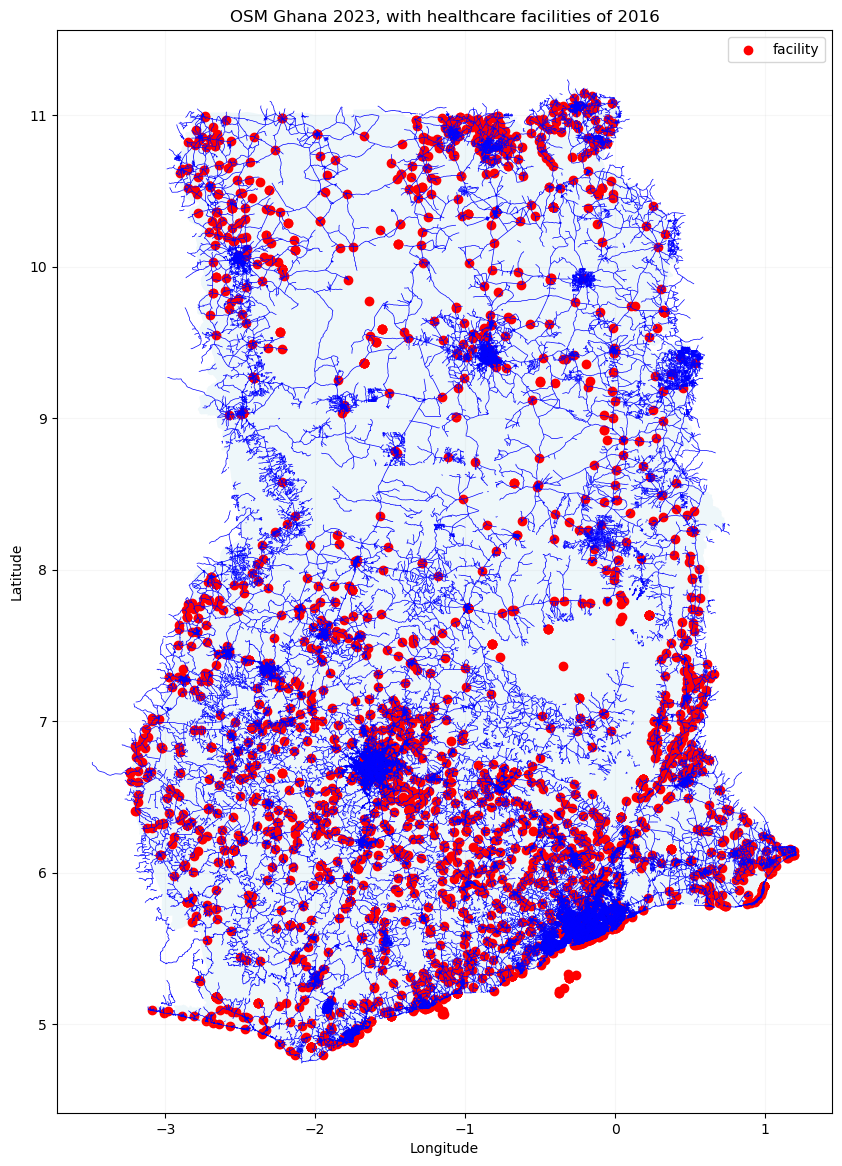

The number of health facilities in this figure: 3756


In [64]:
# Plotting OSM 2023

fig, ax = plt.subplots(figsize=(10, 15))  # You can adjust the figure size as needed
outlineghana.plot(ax=ax, color='lightblue', alpha=0.2)  # Plot the boundary first
osmghana2023.plot(ax=ax, color='blue', linewidth=0.5)  # Plot the roads on top

plt.scatter(fac['Longitude'], fac['Latitude'], color ='red', label='facility')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('OSM Ghana 2023, with healthcare facilities of 2016')
plt.grid(alpha = 0.1)
plt.legend()
plt.show()

print('The number of health facilities in this figure: {}'.format(len(fac)))

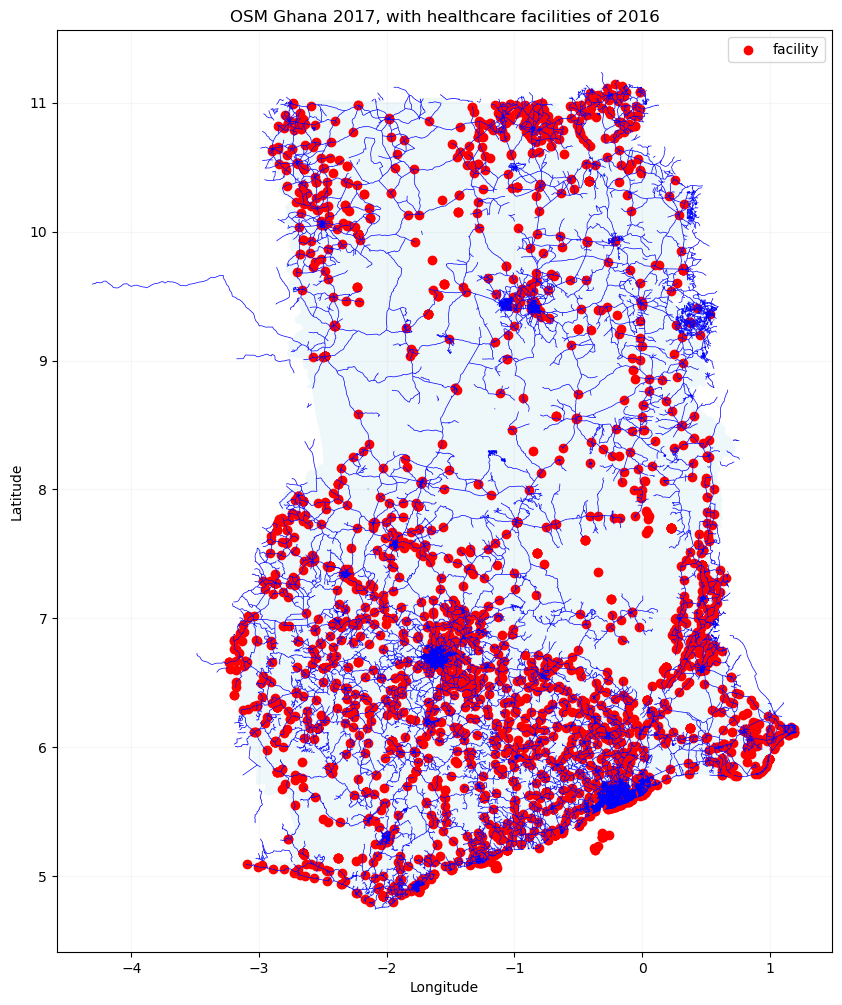

The number of health facilities in this figure: 3756


In [65]:
# Plotting OSM 2017

fig, ax = plt.subplots(figsize=(10, 15))  # You can adjust the figure size as needed
outlineghana.plot(ax=ax, color='lightblue', alpha=0.2)  # Plot the boundary first
osmghana2017.plot(ax=ax, color='blue', linewidth=0.5)  # Plot the roads on top

plt.scatter(fac['Longitude'], fac['Latitude'], color ='red', label='facility')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('OSM Ghana 2017, with healthcare facilities of 2016')
plt.grid(alpha = 0.1)
plt.legend()
plt.show()

print('The number of health facilities in this figure: {}'.format(len(fac)))

## Calculate Road Network Expansion

In [66]:
# We reproject the data to the World Mercator projection (EPSG:3395) to be able to calculate distances in meters
osmghana2017roads = osmghana2017.to_crs(epsg=3395)
osmghana2023roads = osmghana2023.to_crs(epsg=3395)
groadsghana2010roads = groadsghana2010.to_crs(epsg=3395)


In [67]:
# We compute the total length of the roads
total_length_2023 = 0
total_length_2017 = 0
total_length_2010 = 0

for line in osmghana2023roads.geometry:
    total_length_2023 += line.length

for line in osmghana2017roads.geometry:
    total_length_2017 += line.length
    
for line in groadsghana2010roads.geometry:
    total_length_2010 += line.length

print(f"Total length of all roads in 2023 (OSM): {total_length_2023 / 1000:.2f}km")
print(f"Total length of all roads in 2017 (OSM): {total_length_2017 / 1000:.2f}km")
print(f"Total length of all roads in 2010 (GRoads): {total_length_2010 / 1000:.2f}km")


Total length of all roads in 2023 (OSM): 155946.53km
Total length of all roads in 2017 (OSM): 68163.99km
Total length of all roads in 2010 (GRoads): 22758.38km


In [68]:
# We compute the expansion of the road network between 2020 and 2023
expansion_2017_2023 = (total_length_2023 - total_length_2017) / total_length_2017 * 100
expansion_2010_2017 = (total_length_2017 - total_length_2010) / total_length_2010 * 100
expansion_2010_2023 = (total_length_2023 - total_length_2010) / total_length_2010 * 100

print(f"Expansion of the road network 2017-2023: {expansion_2017_2023:.2f}%")
print(f"Expansion of the road network 2010-2017: {expansion_2010_2017:.2f}%")
print(f"Expansion of the road network 2010-2023: {expansion_2010_2023:.2f}%")

Expansion of the road network 2017-2023: 128.78%
Expansion of the road network 2010-2017: 199.51%
Expansion of the road network 2010-2023: 585.23%


We have to keep in mind that the Groads data is probably more limited than the OSM by focusing on the larger (primary) roads. Ideally the data should be from OSM to have a fair comparison. As mentioned before, due to the really large storage area needed the earliest possible data we could get for OSM was 2017. Nonetheless, we can already see that even in the period 2017 tot 2023 there was a spectular increase in the road expansion. For the OSM data we could see some roads extending in neighbouring countries, the length of these are considered to be of minimal impact on the overall conclusion. Overall we can conclude that the road expansion has increased considerably over the years